<a href="https://colab.research.google.com/github/Loijz/Python/blob/Quickdraw/quickdraw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
dataset_url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"

categories = ["hurricane"]

!pip3 install wget

import wget
import os

for category in categories:

  if not os.path.exists("/" + str(category) + ".npy"):

    url_to_category_dataset = dataset_url + str(category) + ".npy"

    wget.download(url = url_to_category_dataset,
                out = ""
                )

  else:
    print("Dataset already downloaded")

In [31]:
classes_dictionary = {}

import numpy

for category in categories:

  classes_dictionary[category] = numpy.load(str(category) + ".npy")

for index, (key, value) in enumerate(classes_dictionary.items()):

  print(len(classes_dictionary))

  value = value.astype("float32")

  if index == 0:

    classes_dictionary[key] = numpy.c_[value,
                                       numpy.zeros(len(value))]

  else:
    classes_dictionary[key] = numpy.c_[value,
                                       index * numpy.ones(len(value))]

data = []
training_samples = 5000

for key, value in classes_dictionary.items():

  data.append(value[:training_samples])

numpy_data = numpy.concatenate(data)

train_x = numpy_data[:, :784]
train_y = numpy_data[:, -1].astype("int")

train_x = train_x.reshape(train_x.shape[0], 28, 28, 1).astype("float32")

train_x.shape

train_x = (train_x - 127.5) / 127.5


1


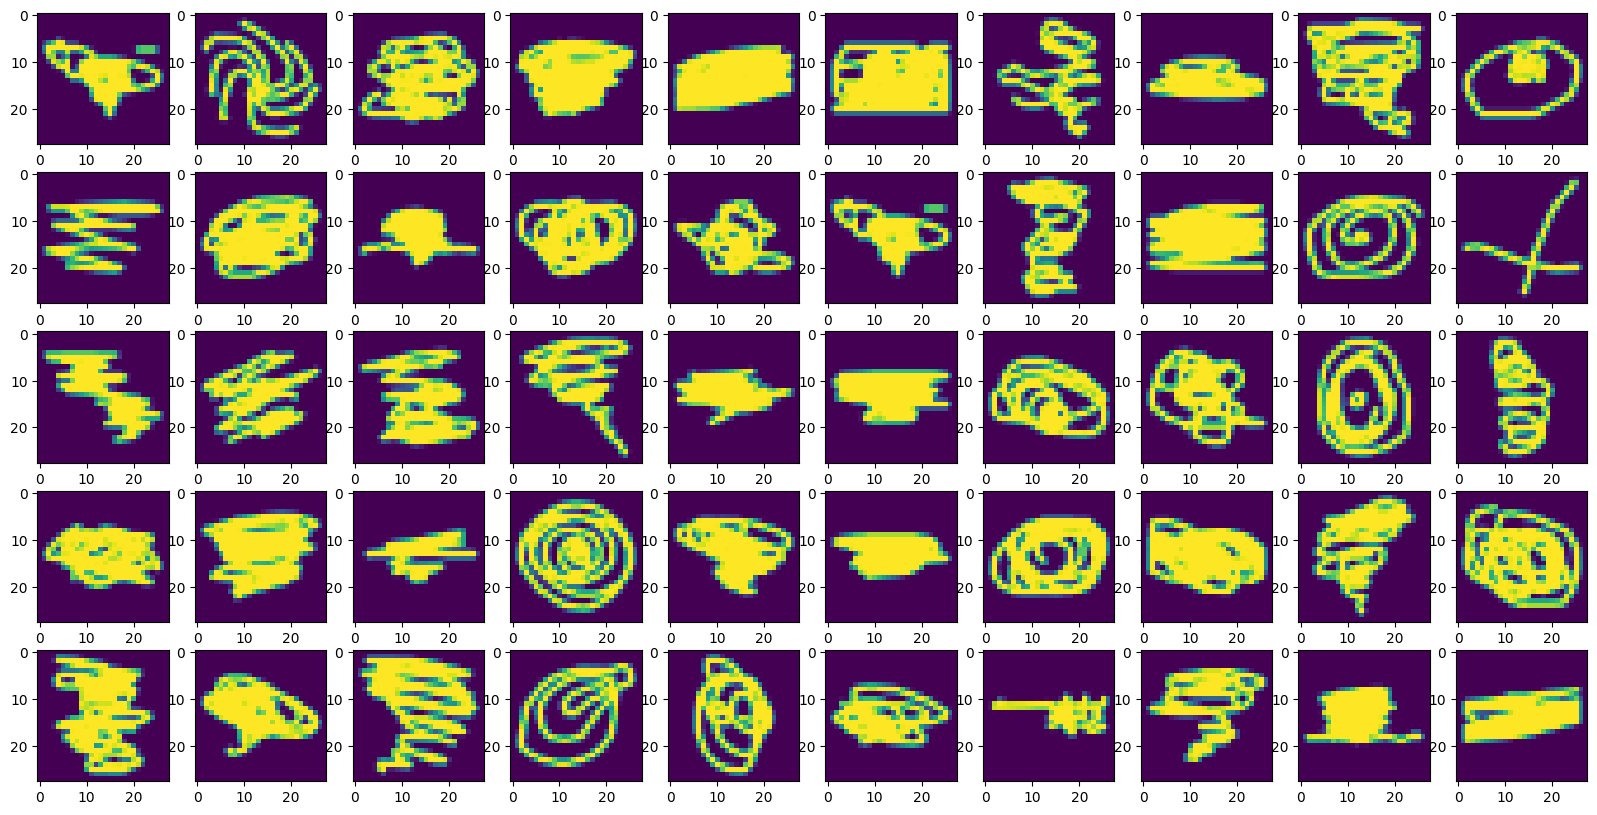

In [32]:
import matplotlib.pyplot as pyplot
import random

def visualize_dataset(x, y):
  figures, axes = pyplot.subplots(5, 10, figsize = (20, 10))

  for label in range (0, 50):

    random_label = random.randint(0, len(x) -1)

    image = x[random_label].reshape(28, 28)

    x_coordinate = label // 10

    y_coordinate = label % 10

    axes[x_coordinate, y_coordinate].imshow(image)

  pyplot.show()

visualize_dataset(train_x, train_y)